In [1]:
%matplotlib inline

c:\users\ismagil\appdata\local\programs\python\python35\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

Primero definimos una función para calcular el campo eléctrico

In [3]:
def E(xp, yp, xf=0, yf=0, q=1):
    """Campo Eléctrico en 2 Dimensiones 
    en un punto de prueba xp, yp
    de una carga fuente en un punto xf, yf
    de valor q
    """    
    
    Dx = xp - xf
    Dy = yp - yf
    
    den = (Dx**2 + Dy**2)**1.5
    
    # Noten que la respuesta e sun vector (Ex, Ey).
    return q * Dx / den, q * Dy / den

Algunos graficos a lo largo de los ejes cartesianos de una carga en el origen

In [4]:
def E2(xp, yp, a, q1, q2):
    """Campo Eléctrico en 2 Dimensiones 
    en un punto de prueba xp, yp
    de dos cargas separadas una distancia a sobre el eje y
    de valor q1 y q2
    """
    
    # Calculo el campo de cada carga ...
    E1x, E1y = E(xp, yp, 0, a/2, q1)
    E2x, E2y = E(xp, yp, 0, -a/2, q2)
    
    # y sumo porque vale superposicion.
    return E1x + E2x, E1y + E2y


def Edip(xp, yp, p):
    """Campo Eléctrico de un dipolo en 2 Dimensiones
    en un punto de prueba xp, yp
    para un dipolo sobre el eje y de valor p
    """
    
    campoX = 3 * p * yp * xp
    campoY = 3 * p * yp * yp - p
    
    den = (xp**2 + yp**2)**1.5
    
    # Noten que la respuesta e sun vector (Ex, Ey).
    return campoX / den, campoY / den

In [5]:
# Primero definimos un rango para graficar, de 1 a 10 con 100 pasos
rango = np.linspace(1, 10, 100)

# Campo a lo largo del Eje X para dos cargas iguales a una distancia 1
Ex, Ey = E2(rango, 0, a=1, q1=1, q2=-1)

# Calculo también el campo para una carga de valor 2 en el origen
dip_Ex, dip_Ey = Edip(rango, 0, 1)

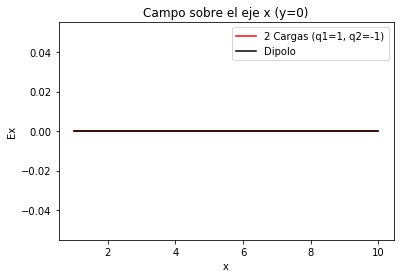

In [6]:
plt.plot(rango, Ex, 'r', rango, dip_Ex, 'k');
plt.xlabel('x');
plt.ylabel('Ex');
plt.title('Campo sobre el eje x (y=0)');
plt.legend(['2 Cargas (q1=1, q2=-1)', 'Dipolo']);

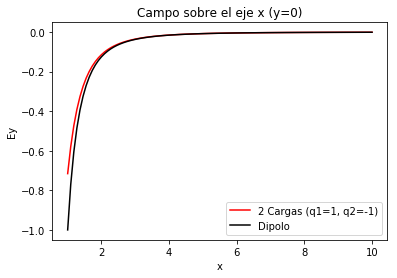

In [7]:
plt.plot(rango, Ey, 'r', rango, dip_Ey, 'k');
plt.xlabel('x');
plt.ylabel('Ey');
plt.title('Campo sobre el eje x (y=0)')
plt.legend(['2 Cargas (q1=1, q2=-1)', 'Dipolo']);

In [8]:
# Ahora lo mismo sobre el eje y 
Ex, Ey = E2(0, rango, a=1, q1=1, q2=-1)
dip_Ex, dip_Ey = E(0, rango, q=2)

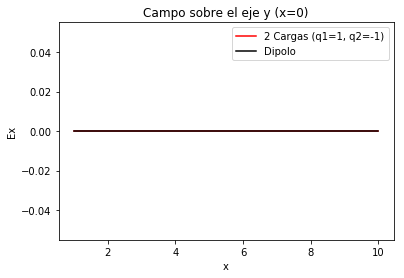

In [9]:
plt.plot(rango, Ex, 'r', rango, dip_Ex, 'k');
plt.xlabel('x');
plt.ylabel('Ex');
plt.title('Campo sobre el eje y (x=0)');
plt.legend(['2 Cargas (q1=1, q2=-1)', 'Dipolo']);

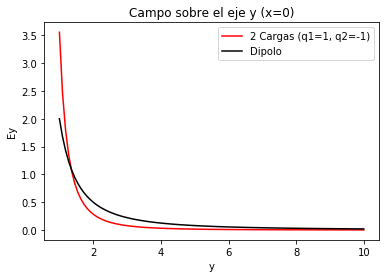

In [10]:
plt.plot(rango, Ey, 'r', rango, dip_Ey, 'k');
plt.xlabel('y');
plt.ylabel('Ey');
plt.title('Campo sobre el eje y (x=0)');
plt.legend(['2 Cargas (q1=1, q2=-1)', 'Dipolo']);

In [11]:
# Generamos una grilla donde vamos a calcular el campo eléctrico
nx, ny = 64, 64
rangoX = np.linspace(-2, 2, nx)*1
rangoY = np.linspace(-2, 2, ny)*1
grillaX, grillaY = np.meshgrid(rangoX, rangoY)

# Y calculamos los campos
Ex, Ey = E2(grillaX, grillaY, a=1, q1=1, q2=-1)

dip_Ex, dip_Ey = Edip(grillaX, grillaY, 1)

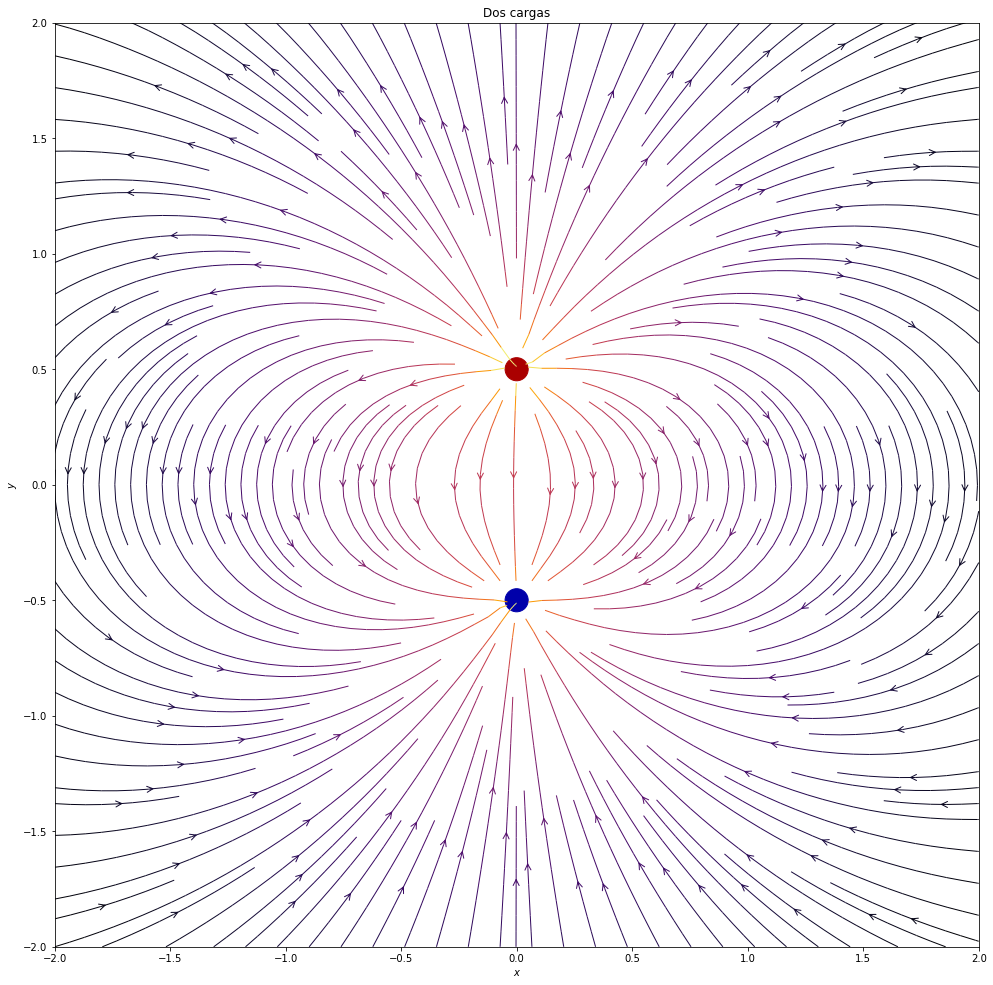

In [12]:
fig = plt.figure(figsize=(17,17))
ax = fig.add_subplot(111)


color = np.log(np.sqrt(Ex**2 + Ey**2))
ax.streamplot(grillaX, grillaY, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

ax.add_artist(Circle([0,0.5], 0.05, color='#aa0000'))
ax.add_artist(Circle([0,-0.5], 0.05, color='#0000aa'))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_aspect('equal')
ax.set_title('Dos cargas')
plt.show()

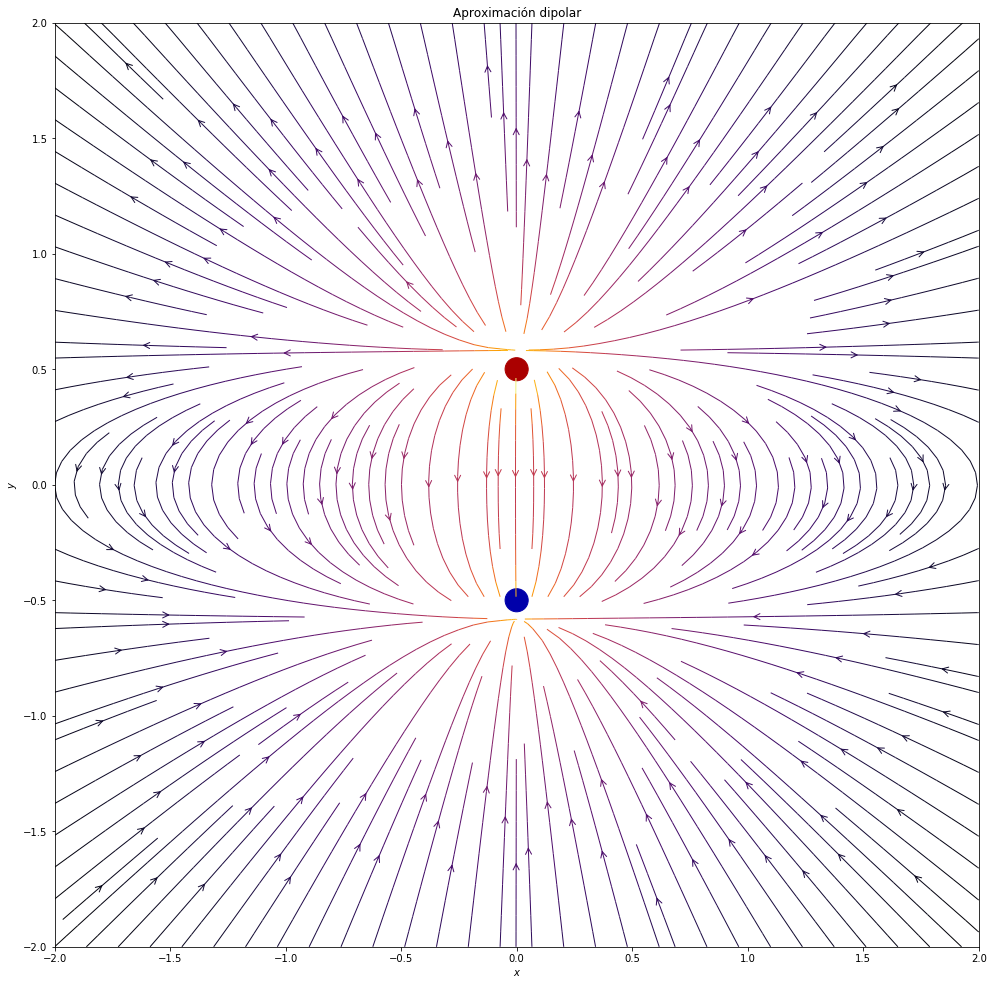

In [13]:
fig = plt.figure(figsize=(17,17))
ax = fig.add_subplot(111)


color = np.log(np.sqrt(Ex**2 + Ey**2))
ax.streamplot(grillaX, grillaY, dip_Ex, dip_Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

ax.add_artist(Circle([0,0.5], 0.05, color='#aa0000'))
ax.add_artist(Circle([0,-0.5], 0.05, color='#0000aa'))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_aspect('equal')
ax.set_title('Aproximación dipolar')
plt.show()